In [148]:
import pandas as pd
import seaborn as sns 
import numpy as np
import glob
import matplotlib.pyplot as plt
%matplotlib inline
%config Completer.use_jedi = False

#import required sklearn for random forest classifier

import sklearn as sklearn
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error, classification_report, confusion_matrix,roc_auc_score
from sklearn.utils import resample
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import mutual_info_classif,VarianceThreshold, SelectFromModel
from sklearn.svm import LinearSVC

In [86]:
#Load the filtered cis eQTL and trans eQTL file

cis_eQTL_file = '/Users/jake/OneDrive - University of Glasgow/Project/COAD/eQTL/eQTL_95/COAD_FPKM_cis_eQTL_95.csv'
#trans_eQTL_file = '/Users/jake/OneDrive - University of Glasgow/Project/COAD/eQTL/eQTL_95/COAD_FPKM_trans_eQTL_95.csv'

cis_eQTL = pd.read_csv(cis_eQTL_file,header=[0,1],sep='\t',index_col=[0])
#trans_eQTL = pd.read_csv(trans_eQTL_file,header=[0,1],sep='\t',index_col=[0])

In [87]:
cis_eQTL

Gene_symbol,FABP2,ZNF117,XKR9,NUDT13,C2orf74,METTL18,WFDC3,CPNE1,N6AMT1,ULK4,...,DHFR,SLC13A4,ZNF239,RGS6,PCCB,ZNF585A,ZNF79,STMP1,RAB33B,Cancer
Gene_ensembl_id,ENSG00000145384,ENSG00000152926,ENSG00000221947,ENSG00000166321,ENSG00000237651,ENSG00000171806,ENSG00000124116,ENSG00000214078,ENSG00000156239,ENSG00000168038,...,ENSG00000228716,ENSG00000164707,ENSG00000196793,ENSG00000182732,ENSG00000114054,ENSG00000196967,ENSG00000196152,ENSG00000243317,ENSG00000172007,Cancer
Sample_ID,,,,,,,,,,,,,,,,,,,,,
TCGA-AA-3867-01A-01R-1022-07,3.037137,0.196912,0.134775,0.772429,0.000000,2.234588,1.247353,107.213731,2.325869,0.495977,...,1.945705,0.124761,1.824938,0.029445,5.974278,0.313096,1.463202,11.145080,2.355141,1
TCGA-CA-6719-01A-11R-1839-07,0.099824,1.756354,0.023035,0.695770,0.341397,4.631485,1.458658,80.408275,1.687151,0.758817,...,2.045258,0.067337,4.956423,0.145942,8.007415,0.733702,2.608254,11.654345,1.838190,1
TCGA-NH-A50V-01A-11R-A28H-07,0.048827,3.480090,1.626679,1.055877,0.199660,3.846554,1.718902,61.832780,3.672512,1.192345,...,2.881462,0.150959,4.854547,0.243694,7.036026,0.845391,1.699452,8.839348,2.831534,1
TCGA-AA-A01C-01A-01R-A00A-07,2.460243,0.846169,0.050361,1.248144,0.194714,1.931712,2.207834,115.282003,1.212708,0.911712,...,2.854681,0.049073,2.469037,0.044010,5.248116,0.356468,2.306620,14.420458,0.586697,1
TCGA-AA-A02F-01A-01R-A089-07,0.302252,1.668233,0.011988,0.482781,0.000000,6.110972,1.265169,67.596046,1.337464,0.910752,...,4.278732,0.052564,5.149422,0.010476,4.530721,0.722315,1.504792,11.204312,1.508238,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TCGA-A6-2682-11A-01R-A32Z-07,15.418344,0.596458,0.522916,1.342880,0.449282,2.667528,0.230884,20.136296,2.036059,0.462847,...,3.965134,0.071515,0.721056,0.114243,8.197457,0.459543,2.388808,10.089674,1.481993,0
TCGA-AA-3522-11A-01R-A32Z-07,14.217190,0.575132,0.135610,1.342037,0.194190,4.381274,0.189608,18.652374,2.110484,0.395752,...,4.103690,0.126635,0.703542,0.149782,9.116541,0.600264,2.000086,9.840412,1.878232,0


In [88]:
#combined_eQTLs = cis_eQTL.reset_index().merge(trans_eQTL, on=cis_eQTL.index,).set_index('Sample_ID').drop('key_0',axis=1)
#combined_eQTLs

In [89]:
#### Just working on cis_eQTLs for practice

In [90]:
#Check cis_eQTL for and missing data

cis_eQTL.isnull().sum().unique()

array([0])

In [91]:
#Quick Random Forest attempt

#set features (X) as all genes and target (y) as Cancer column

X = cis_eQTL.drop('Cancer',axis=1,level='Gene_symbol')
y = cis_eQTL['Cancer','Cancer']

#Do train test split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

RF_model = RandomForestClassifier(random_state=1)

RF_model.fit(X_train,y_train)

preds = RF_model.predict(X_test)

print ('Train', X_train.shape, y_train.shape)
print ('Test', X_test.shape, y_test.shape)

Train (363, 215) (363,)
Test (156, 215) (156,)


In [93]:
print('Quick Random Forest results:')
print('\n')
print('RMSE:',np.sqrt(mean_squared_error(preds,y_test)))
print('\n')
print (confusion_matrix(preds,y_test))
print('\n')
print (classification_report(preds,y_test))

Quick Random Forest results:


RMSE: 0.0


[[ 13   0]
 [  0 143]]


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      1.00      1.00       143

    accuracy                           1.00       156
   macro avg       1.00      1.00      1.00       156
weighted avg       1.00      1.00      1.00       156



In [94]:
#Area under ROC curve maybe better performance metric for classification
#Which gives the likelihood of model distinguishing between two classes .. want AUROC score > 0.5 so not random

#To calclulate AUROC need predicted class probabilities instead predicted classes

#Predicted class probabilities
prob = RF_model.predict_proba(X_test)

# Keep only the positive class
prob = [p[1] for p in prob]

print(roc_auc_score(y_test,prob))


1.0


Cancer
1         478
0          41
dtype: int64

Ratio: 11.66 : 1


<AxesSubplot:title={'center':'Cancer Target Count'}, xlabel='Cancer'>

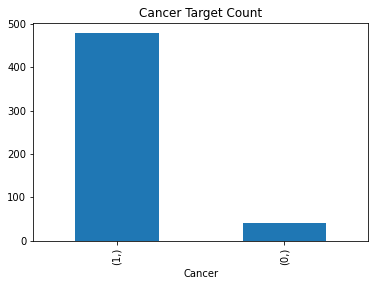

In [95]:
#Check the testue counts for the target cancer variable ... can see its unbalanced around 12 to 1

target_count = cis_eQTL['Cancer'].value_counts()
display(target_count)

print('Ratio:', round(target_count[1] / target_count[0], 2), ': 1')

target_count.plot(kind='bar',title = 'Cancer Target Count')

In [96]:
#Try adding class_weight argument = to ratio for each class in RandomForestClassifier

RF_model_weight = RandomForestClassifier(random_state=1,class_weight={0:1,1:round(target_count[1] / target_count[0], 2)})

RF_model_weight.fit(X_train,y_train)

preds_weight = RF_model_weight.predict(X_test)

preds_prob = RF_model_weight.predict_proba(X_test)

In [97]:
print('Class weight Random Forest results:')
print('\n')
print('RMSE:',np.sqrt(mean_squared_error(preds_weight,y_test)))
print('\n')
print (confusion_matrix(preds_weight,y_test))
print('\n')
print (classification_report(preds_weight,y_test))
print('\n')
print ('AUROC score:',roc_auc_score(y_test,[p[1] for p in preds_prob]) )

Class weight Random Forest results:


RMSE: 0.08006407690254357


[[ 12   0]
 [  1 143]]


              precision    recall  f1-score   support

           0       0.92      1.00      0.96        12
           1       1.00      0.99      1.00       144

    accuracy                           0.99       156
   macro avg       0.96      1.00      0.98       156
weighted avg       0.99      0.99      0.99       156



AUROC score: 1.0


In [98]:
#Important to do train test split before resampling imbalanced data!!
#Now down sample the majoirty class scklearn resample

# concatenate training data back together
X_resample = pd.concat([X_train, y_train], axis=1)

In [99]:
X_resample.head()

Gene_symbol,FABP2,ZNF117,XKR9,NUDT13,C2orf74,METTL18,WFDC3,CPNE1,N6AMT1,ULK4,...,DHFR,SLC13A4,ZNF239,RGS6,PCCB,ZNF585A,ZNF79,STMP1,RAB33B,Cancer
Gene_ensembl_id,ENSG00000145384,ENSG00000152926,ENSG00000221947,ENSG00000166321,ENSG00000237651,ENSG00000171806,ENSG00000124116,ENSG00000214078,ENSG00000156239,ENSG00000168038,...,ENSG00000228716,ENSG00000164707,ENSG00000196793,ENSG00000182732,ENSG00000114054,ENSG00000196967,ENSG00000196152,ENSG00000243317,ENSG00000172007,Cancer
Sample_ID,,,,,,,,,,,,,,,,,,,,,
TCGA-D5-7000-01A-11R-A32Z-07,6.991351,1.436497,3.022251,1.215372,0.324584,3.128243,0.495442,46.743279,1.897160,0.526088,...,7.901626,0.080231,2.924812,0.010581,9.891055,0.548517,1.848605,14.578190,2.708346,1
TCGA-AA-3831-01A-01R-0905-07,1.158783,0.525983,0.183833,1.835085,0.052649,2.653709,0.381403,35.371574,2.672426,0.606193,...,6.196143,0.124396,3.830781,0.169575,15.005846,0.341057,2.165587,11.349630,2.530267,1
TCGA-D5-5541-01A-01R-1653-07,0.063066,0.786102,0.435769,0.922962,0.389689,5.380883,0.786979,133.166301,2.013019,0.519946,...,4.501506,0.077992,5.322031,0.009715,5.034937,0.781206,2.323256,16.645564,2.593560,1
TCGA-AA-3877-01A-01R-1022-07,0.262555,5.264044,1.808907,1.345686,0.061350,4.682565,0.173909,16.435309,2.149282,0.847647,...,6.429593,0.110165,4.649077,0.005200,10.310028,0.345583,1.897651,20.125407,2.865234,1
TCGA-CK-5914-01A-11R-1653-07,1.192615,1.253866,0.019786,1.103315,0.101997,4.700394,0.313227,128.903266,1.083902,0.560768,...,5.419256,0.009640,3.518241,0.155615,5.041772,0.836690,1.283796,16.690630,2.147467,1


In [100]:
#seperate tumour and normal samples

tumour = X_resample[X_resample['Cancer','Cancer']==1]
normal = X_resample[X_resample['Cancer','Cancer']==0]

In [101]:
#Now downsample the majorit class .. n_samples = numb of minority samples

majority_downsampled = resample(tumour,
                                replace = False,
                                n_samples= len(normal),
                                random_state = 1)

In [102]:
# combine minority (normal) and majority downsampled

downsampled = pd.concat([majority_downsampled, normal])
downsampled['Cancer'].value_counts()

Cancer
0         28
1         28
dtype: int64

In [103]:
#Now try running model on the downsampled data

y_train_down = downsampled['Cancer','Cancer']
X_train_down = downsampled.drop('Cancer',axis = 1)

downsampled_RF_model = RandomForestClassifier(random_state=1)

downsampled_RF_model.fit(X_train_down,y_train_down)

/Users/jake/opt/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:4147: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


RandomForestClassifier(random_state=1)

In [104]:
#Make predictions on original X_test

downsampled_preds = downsampled_RF_model.predict(X_test)

downsampled_prob = downsampled_RF_model.predict_proba(X_test)

In [105]:
print('Downsampled resampling results:')
print('\n')
print('RMSE:',np.sqrt(mean_squared_error(downsampled_preds,y_test)))
print('\n')
print (confusion_matrix(downsampled_preds,y_test))
print('\n')
print (classification_report(downsampled_preds,y_test))
print('\n')
print ('AUROC score:',roc_auc_score(y_test,[p[1] for p in downsampled_prob]) )

Downsampled resampling results:


RMSE: 0.11322770341445958


[[ 13   2]
 [  0 141]]


              precision    recall  f1-score   support

           0       1.00      0.87      0.93        15
           1       0.99      1.00      0.99       141

    accuracy                           0.99       156
   macro avg       0.99      0.93      0.96       156
weighted avg       0.99      0.99      0.99       156



AUROC score: 1.0


In [106]:
#Repeat process but with upsampling this this => randomly duplicate testues from minority normal class to increase sample size

In [107]:
#upsample the minority normal class .. n_samples = num of tumour samples, replace = True
minority_upsampled = resample(normal,
                             replace = True,
                             n_samples = len(tumour),
                             random_state = 1)

In [108]:
# Combine majority tumour class with upsampled normal class

upsampled = pd.concat([tumour, minority_upsampled])
upsampled['Cancer'].value_counts()

Cancer
0         335
1         335
dtype: int64

In [158]:
#Now try running model on the downsampled data

y_train_up = upsampled['Cancer','Cancer']
X_train_up = upsampled.drop('Cancer',axis = 1)

upsampled_RF_model = RandomForestClassifier(random_state=1)

upsampled_RF_model.fit(X_train_up,y_train_up)

upsampled_preds = upsampled_RF_model.predict(X_test)

upsampled_prob = upsampled_RF_model.predict_proba(X_test)

/Users/jake/opt/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:4147: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


In [157]:
print('Upsampled resampling results:')
print('\n')
print('RMSE:',np.sqrt(mean_squared_error(upsampled_preds,y_test)))
print('\n')
print (confusion_matrix(upsampled_preds,y_test))
print('\n')
print (classification_report(upsampled_preds,y_test))
print('\n')
print ('AUROC score:',roc_auc_score(y_test,[p[1] for p in upsampled_prob]) )

Upsampled resampling results:


RMSE: 0.0


[[ 13   0]
 [  0 143]]


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      1.00      1.00       143

    accuracy                           1.00       156
   macro avg       1.00      1.00      1.00       156
weighted avg       1.00      1.00      1.00       156



AUROC score: 1.0


In [111]:
#### Cross validation attempt using the weighted RF model 

In [112]:
#First create pipeline since easier to use cross validation with pipeline
#Combine in function with cross test score to determine best RMSE in relation to different n_estimators in random forest
#Multiply by -1 since sklearn calculates negative RMSE adn try splitting data 5 times => cv=5

def cross_test(n_estimators):
    '''Return the mean RMSE for Random Forest Classifier with 5 fold split in data. Takes in n_estimators as argument for number of trees'''
    
    
    RF_weight_pipeline = Pipeline(steps=[('model', RandomForestClassifier(n_estimators,random_state=1,
                                                                          class_weight={0:1,1:round(target_count[1] / target_count[0], 2)}))])
    
    scores = -1 * cross_val_score(RF_weight_pipeline, X, y,
                              cv=5,
                              scoring='neg_root_mean_squared_error')
    return scores.mean()
    

In [113]:
#Show dictionary displaying the average RMSE for different number of trees

cross_val_results = {}

for i in range(100,600,100):
    cross_val_results[i] = cross_test(i)
    
cross_val_results

{100: 0.09478821869962718,
 200: 0.07508163313634132,
 300: 0.06695823683889826,
 400: 0.07508163313634132,
 500: 0.07508163313634132}

In [114]:
### Feature Engineering

In [115]:
#Initially could remove genes with quasi constant FPKM values across all samples
#This can be done using sklearns VarianceThreshold .. set threshold at 0.01 to remove genes where 99% of FPKM values the same

quasi_constant = VarianceThreshold(threshold=0.01) 
quasi_constant.fit(X_train)

VarianceThreshold(threshold=0.01)

In [116]:
# sum over get_support, to get the number of features that are not quasi-constant

display(sum(quasi_constant.get_support()))
len(X_train.columns)

204

215

In [117]:
#See genes that are quasi constant 

[x for x in X_train.columns if x not in X_train.columns[quasi_constant.get_support()]]

[('ADGRF2', 'ENSG00000164393'),
 ('GLIPR1L2', 'ENSG00000180481'),
 ('RGPD4', 'ENSG00000196862'),
 ('GTF2A1L', 'ENSG00000242441'),
 ('ITIH4', 'ENSG00000055955'),
 ('CCDC73', 'ENSG00000186714'),
 ('CLEC18A', 'ENSG00000157322'),
 ('FAM228A', 'ENSG00000186453'),
 ('EFHB', 'ENSG00000163576'),
 ('TRIM63', 'ENSG00000158022'),
 ('TMEM232', 'ENSG00000186952')]

In [118]:
# The if want to remove the features from training and test set
#X_train = quasi_constant.transform(X_train)
#X_test = quasi_constant.transform(X_test)

In [119]:
#Mutual information scores


def mi_scores(X, y):
    mi_scores = mutual_info_classif(X, y)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

In [120]:
mi_scores_show = mi_scores(X,y)

<AxesSubplot:xlabel='Gene_symbol,Gene_ensembl_id'>

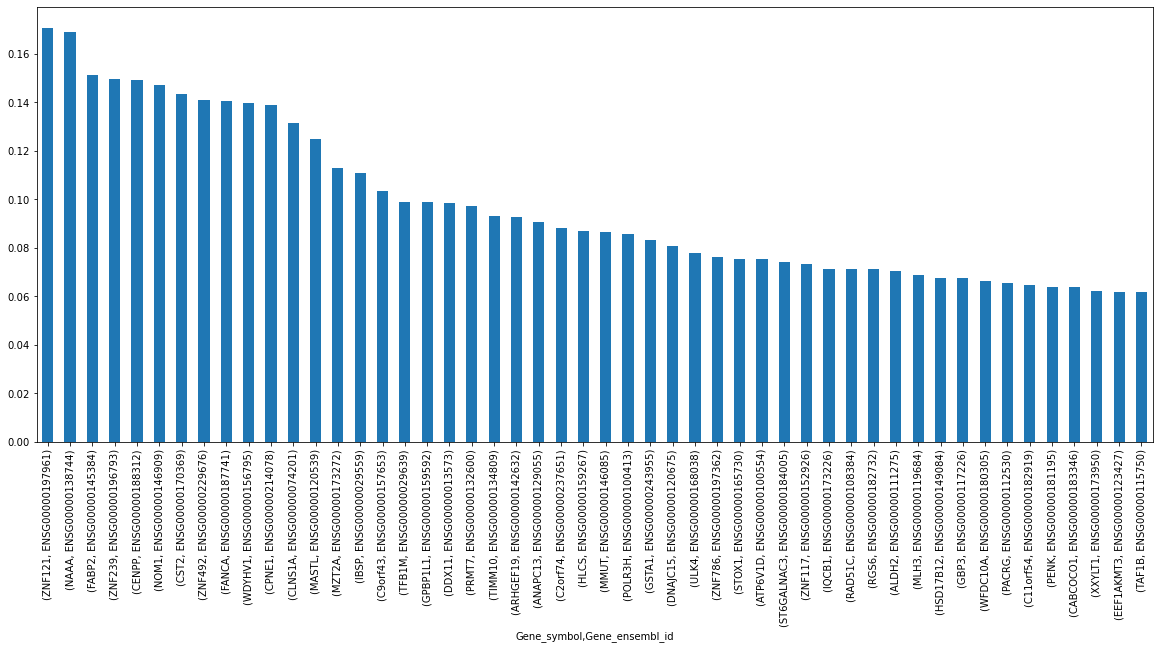

In [131]:
plt.figure(figsize=(20,8))
mi_scores_show.head(50).plot(kind='bar')

In [122]:
mi_scores_show[mi_scores_show >=  0.1]

Gene_symbol  Gene_ensembl_id
ZNF121       ENSG00000197961    0.170887
NAAA         ENSG00000138744    0.168955
FABP2        ENSG00000145384    0.151514
ZNF239       ENSG00000196793    0.149805
CENPP        ENSG00000188312    0.149072
NOM1         ENSG00000146909    0.147254
CST2         ENSG00000170369    0.143387
ZNF492       ENSG00000229676    0.141175
FANCA        ENSG00000187741    0.140407
WDYHV1       ENSG00000156795    0.139763
CPNE1        ENSG00000214078    0.138908
CLNS1A       ENSG00000074201    0.131398
MASTL        ENSG00000120539    0.124860
MZT2A        ENSG00000173272    0.113056
IBSP         ENSG00000029559    0.110730
C9orf43      ENSG00000157653    0.103559
Name: MI Scores, dtype: float64

In [123]:
#sns.pairplot(cis_eQTL[['Cancer','ZNF121','NAAA','FABP2']])

In [124]:
#Random Forest comes with a feature_importances_ method to rank the important of the input features
#Attempt with weighted RF model to see how it compares to the features identified by mutual importance above

feat_importances = pd.Series(RF_model_weight.feature_importances_, index= X.columns)

In [128]:
feat_importances.sort_values(ascending=False).head(10)

Gene_symbol  Gene_ensembl_id
NAAA         ENSG00000138744    0.098049
CST2         ENSG00000170369    0.065841
FABP2        ENSG00000145384    0.044330
ZNF121       ENSG00000197961    0.044116
WDYHV1       ENSG00000156795    0.032133
GSTA1        ENSG00000243955    0.025186
FANCA        ENSG00000187741    0.024361
ZNF239       ENSG00000196793    0.019550
ZNF492       ENSG00000229676    0.019226
CENPP        ENSG00000188312    0.019172
dtype: float64

<AxesSubplot:ylabel='Gene_symbol,Gene_ensembl_id'>

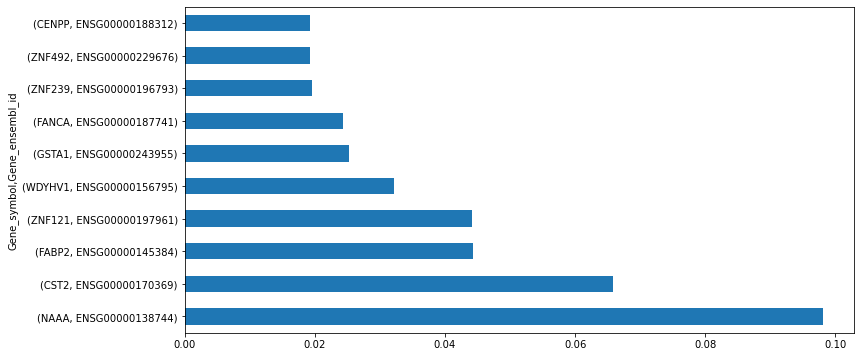

In [129]:
#Plot of feature importances

plt.figure(figsize=(12,6))
feat_importances.nlargest(10).plot(kind='barh')

In [133]:
#SelectFromModel can also be used with random forests to select features 'based on importance weights'

sel = SelectFromModel(RandomForestClassifier(n_estimators=300,random_state=1))
sel.fit(X_train,y_train)

SelectFromModel(estimator=RandomForestClassifier(n_estimators=300,
                                                 random_state=1))

In [136]:
#Use get support on the fitted model to see which features are 'important'

selected_features = X_train.columns[(sel.get_support())]
selected_features

MultiIndex([(     'FABP2', 'ENSG00000145384'),
            (   'C2orf74', 'ENSG00000237651'),
            (     'CPNE1', 'ENSG00000214078'),
            (      'ULK4', 'ENSG00000168038'),
            (     'MZT2A', 'ENSG00000173272'),
            (      'MMUT', 'ENSG00000146085'),
            (     'MASTL', 'ENSG00000120539'),
            (    'ZNF492', 'ENSG00000229676'),
            (   'ATP6V1D', 'ENSG00000100554'),
            (    'BORCS7', 'ENSG00000166275'),
            (      'NAAA', 'ENSG00000138744'),
            (   'ANAPC13', 'ENSG00000129055'),
            (    'CLNS1A', 'ENSG00000074201'),
            (      'GBP3', 'ENSG00000117226'),
            (     'DDX11', 'ENSG00000013573'),
            ('ST6GALNAC3', 'ENSG00000184005'),
            (   'GPBP1L1', 'ENSG00000159592'),
            ( 'EEF1AKMT3', 'ENSG00000123427'),
            (   'PYROXD1', 'ENSG00000121350'),
            (  'CABCOCO1', 'ENSG00000183346'),
            (   'CYP4F12', 'ENSG00000186204'),
            (

<AxesSubplot:ylabel='Gene_symbol,Gene_ensembl_id'>

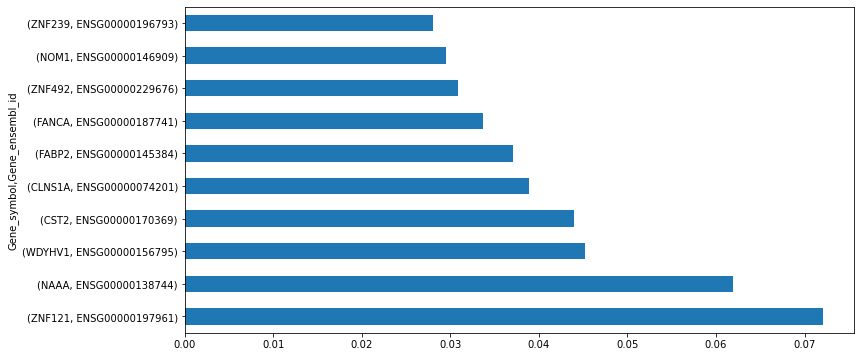

In [147]:
#Produce plot showing feature importance from SelectedFromModel

feat_importances_sel = pd.Series(sel.estimator_.feature_importances_,index= X.columns)

plt.figure(figsize=(12,6))
feat_importances_sel.nlargest(10).plot(kind='barh')

In [159]:
#LVSC feature selection as part of a pipeline with SelectFromModel
#Try with weighted Random forest model

RF_weight_pipeline_LSVC = Pipeline(steps=[('feature_selection', SelectFromModel(LinearSVC(penalty="l1",dual=False))),
    ('model', RandomForestClassifier(n_estimators=300,random_state=1, class_weight={0:1,1:round(target_count[1] / target_count[0], 2)}))])

RF_weight_pipeline_LSVC.fit(X_train,y_train)

LVSC_preds = RF_weight_pipeline_LSVC.predict(X_test)

LVSC_prob = RF_weight_pipeline_LSVC.predict_proba(X_test)

/Users/jake/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [153]:
print('LVSC feature selection results:')
print('\n')
print('RMSE:',np.sqrt(mean_squared_error(LVSC_preds,y_test)))
print('\n')
print (confusion_matrix(LVSC_preds,y_test))
print('\n')
print (classification_report(LVSC_preds,y_test))
print('\n')
print ('AUROC score:',roc_auc_score(y_test,[p[1] for p in LVSC_prob]) )

LVSC feature selection results:


RMSE: 0.11322770341445958


[[ 11   0]
 [  2 143]]


              precision    recall  f1-score   support

           0       0.85      1.00      0.92        11
           1       1.00      0.99      0.99       145

    accuracy                           0.99       156
   macro avg       0.92      0.99      0.95       156
weighted avg       0.99      0.99      0.99       156



AUROC score: 1.0
